# Rossby Modes for Exotic Compact Objects in LALSuite 

*(c) Yasmeen Asali, June 2019*  

Some resources:
- LIGO Parameter Estimation paper [here](https://arxiv.org/pdf/1409.7215.pdf). 
- Sivia and Skilling Data Anlaysis book [here](http://pzs.dstu.dp.ua/DataMining/bayes/bibl/Data%20Analysis.pdf). 

Contents:
- [Rossby Modes](#rossby-modes)
- [Sampling Algorithms](#sampling)
- [Getting Started](#getting-started)
    - SSH Keys
    - Installing LALSuite
    - Using Ctags
- [Adding something to LALSuite](#lalsuite)
    - [LALSimulation](#lalsim)
    - [Checking implementation in Python](#wf-python)
    - [LALInference](#lalinf)
- [Creating a Virtual Environment](#virtualenv)
- [Running LALSuite](#running-lalsuite)
- [Plotting Posterior Samples in Python](#posterior-plots)
- [r-mode Constraints for Exotic Compact Objects](#constraints-eco)
    - [Frequency Constraint](#freq-const)
    - [Phase Constraint](#phase-const)
    - [Implementing constraints in LALInference](#implement-constraint)
- [r-modes from Cecond ECO](#second)
    - [Checking the implementation](#check-implementation)
- [Bayes Factor](#bayes)
- [Analyzing Posterior Samples](#posterior)

<a id='rossby-modes'></a>
# Rossby modes

Rossby modes (r-modes) can be driven by resonances between the orbital and spin frequencies of binary compact objects. This resonance will have some effect on the gravitational wave signal, which we can approximate in the following way. 

At early times, the phase of waveform will be approximately equal to the phase from orbiting point particles: $ \Phi(t) = \Phi_{pp} $. When the frequency of the gravitational wave becomes equal to the resonant frequency, some phase evolution will occur. After the time at which resonance occurs, the phase can be represented as:

$$ \Phi(t) = \Phi_{pp}(t+\Delta t) - \Delta \Phi $$

So the effect of the resonance will cause an overall phase shift and a time shift in the gravitational wave signal. These can be related by:

$$ \Delta \Phi = \frac{\Delta \Phi}{\Delta t} \Delta t = \frac{d\Phi}{dt}\Delta t = \dot{\Phi}_{pp}(t_{0})\Delta t $$

when $\Delta t$ is sufficently small so $ \frac{\Delta \Phi}{\Delta t} $ can be approximated as a derivative. Plugging this into the above equation:

$$ \Phi(t) = \Phi_{pp}(t+\Delta t) - \dot{\Phi}_{pp}(t_{0})\Delta t $$  

Using a taylor expansion: 

$$ \Phi(t) = \Phi_{pp}(t) + \dot{\Phi}_{pp}(t)\Delta t - \dot{\Phi}_{pp}(t_{0})\Delta t $$

The gravitational wave frequency will be twice the orbital frequency, so $ \dot{\Phi}_{pp} = 2\omega $. Using this relationship we can also say $ \Delta t = \frac{\Delta\Phi}{2\omega(t_{0})} $. Substituting these in: 

$$ \Phi(t) = \Phi_{pp}(t) + [\dot{\Phi}_{pp}(t) - \dot{\Phi}_{pp}(t_{0})]\Delta t $$

$$ \Phi(t) = \Phi_{pp}(t) + [2\omega(t) - 2\omega(t_{0})]\Delta t $$

$$ \Phi(t) = \Phi_{pp}(t) + [2\omega(t) - 2\omega(t_{0})]\frac{\Delta\Phi}{2\omega(t_{0})}$$ 

$$ \Phi(t) = \Phi_{pp}(t) + [\frac{\omega(t)}{\omega(t_{0})} - 1]\Delta\Phi$$

In the frequency domain:

$$ \phi(f) = \phi_{pp}(t) + [\frac{f}{f_{0}} - 1]\Delta\phi$$

In a binary system, both neutron stars will undergo resonance. Each will occur at different frequencies, since the resonant frequency is related to the spin frequency of that object. 

$$ \phi(f) = \phi_{pp}(f) + (\frac{f}{f_{01}} - 1)\Delta\phi_{01}+ (\frac{f}{f_{02}} - 1)\Delta\phi_{02}$$

This gives four free parameters: $(f_{01}, \Delta\phi_{01}, f_{02}, \Delta\phi_{02})$

For the purposes of learning how to work with LALSuite, it is easier to assume only one of the objects undergoes resonance, although this is physically unlikely. The equation can thus be simplified as: 

$$ \phi(f) = \phi_{pp}(f) + (\frac{f}{f_{0}} - 1)\Delta\phi $$

So $(\frac{f}{f_{0}} - 1)\Delta\phi$ is the correction we will implement into LALSuite. 

<a id='sampling'></a>
# Sampling Algorithms 

*TO DO*

## MCMC

Resources
- intuitive explanation [here](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50)
- coding explanation [here](https://twiecki.io/blog/2015/11/10/mcmc-sampling/)

## Nested Sampling
- Skilling paper [here](https://projecteuclid.org/download/pdf_1/euclid.ba/1340370944)


<a id='getting-started'></a>
# Getting Started

### SSH Keys
See SSH help [here](https://git.ligo.org/help/ssh/README#generating-a-new-ssh-key-pair)

First, get an SSH key on the cluster you are working on. Run:

    ssh-keygen -o -t rsa -b 4096 -C "email@example.com"

In the output, see where you public key has been saved. In this case, it is `/home/yasmeen.asali/.ssh/id_rsa.pub`. Copy this and run:
    
    cat /home/yasmeen.asali/.ssh/id_rsa.pub

Copy the ssh key that prints and paste it into [here](https://git.ligo.org/profile/keys)

### Installing LALSuite
See master lalasuite directory on gitlab [here](https://git.ligo.org/lscsoft/lalsuite/tree/master)

Once you have an ssh key, you have access to gitlab. Next, you want to clone lalsuite and make a branch you can edit. Run:

    git clone git@git.ligo.org:lscsoft/lalsuite.git
    cd lalsuite
    git checkout -b lalsuite-v6.57_branch lalsuite-v6.57
   
If you want lalsuite to install in the working directory, change `DIR_FOR_LALSUITE_TO_INSTALL` to that. Otherwise, change it to wherever you want lalsuite

    ./configure --prefix=DIR_FOR_LALSUITE_TO_INSTALL --enable-swig-python --enable-python
    make
    make install
    
You can change the version of lalsuite you fork from in the `git checkout` line. 

### Using Ctags
See ctags help [here](https://andrew.stwrt.ca/posts/vim-ctags/)

On the cluster, ctags is already installed. To use it, go to the lalsuite directory and run `ctags -R`. This will create a `tags` file in this directory, which vim will look for when you are trying to search classes or methods in ctags. You can set this file as the default tags file in your `.vimrc` by opening it and adding the following line: 

    set tags=~/dev/lalsuite/tags
    
The path to the tags file will change depending on where you have the tags file saved.

Some useful ctags commands:

- mouse over a class or method and run `Crtl ]` to jump to another file with that tag
- `Ctrl t` takes you back a step
- `:tag function_name` goes directly to the tag's definition
- `:ts` or `:tselect` shows the list 
- `:tn` or `:tnext` goes to the next tag in that list
- `:tp` or `:tprev` goes to the previous tag in that list 
- `:tf` or `:tfirst` goes to the first tag of the list 
- `:tl` or `:tlast` goes to the last tag of the list


<a id='lalsuite'></a>
# Adding something into LALSuite

In order to add some new effect into lalsuite, you need to add it in at two stages. First, you add the effect into lalsimulation where the waveform will be generated with the appropriate phase differences, etc. Then, you need to add something into lalinference. Specifically, these are the steps taken to implement r-mode effects:
- add the frequency and phase difference effects directly into the generated waveform in `lalsimulation`
- check that it was properly implemented by compiling lalsimulation and generating a waveform for set values of frequency and phase difference (this check can be done in Python)
- add frequency and phase difference as parameters to sample over in `lalinference`


`grep` is a useful tool for finding which files contain certain functions. 

    grep "func" lalinference/src/*.c -l

<a id='lalsim'></a>
## LALSimulation

- Start with adding the equation into LALSimIMRPhenomD.c 
    - You will have to declare any variables, don't forget semicolons add the end of the line
    - For example, adding in the RModes phase shift can be done like this:    
```python
REAL8 f0_rmodes = XLALSimInspiralWaveformParamsLookupRModeFrequency(extraParams);
REAL8 delta_phi_rmodes = XLALSimInspiralWaveformParamsLookupRModePhaseDiff(extraParams);
if(freqs->data[i]>f0_rmodes)
{
phi -= t0*(Mf-MfRef) + phi_precalc + (freqs->data[i]/f0_rmodes - 1)*delta_phi_rmodes; /* adding phase offset */
((*htilde)->data->data)[j] = amp0 * amp * cexp(-I * phi);
}
else {
phi -= t0*(Mf-MfRef) + phi_precalc;
((*htilde)->data->data)[j] = amp0 * amp * cexp(-I * phi);
}
```
    - The function names can be anything as long as you are consistent throughout all the files
- Then you have to add the functions from LALSimIMRPhenomD.c to the LALSimInspiralWaveformParams.c file and the header file (change .c to .h) so that the code will know where to look to find this function. In the .c file, add these lines: 
    ```python
    DEFINE_INSERT_FUNC(RModeFrequency, REAL8, "RmodeFreq", 0)
    DEFINE_INSERT_FUNC(RModePhaseDiff, REAL8, "RmodePhaseDiff", 0)
    
    DEFINE_LOOKUP_FUNC(RModeFrequency, REAL8, "RmodeFreq", 0)
    DEFINE_LOOKUP_FUNC(RModePhaseDiff, REAL8, "RmodePhaseDiff", 0)
    
    DEFINE_ISDEFAULT_FUNC(RModeFrequency, REAL8, "RmodeFreq", 0)
    DEFINE_ISDEFAULT_FUNC(RModePhaseDiff, REAL8, "RmodePhaseDiff", 0)
    ```
- Similarly in the header file, add the appropriate lines by checking how it's done for "lambda1"
- Next, you want to compile the code so that it is executeable. You can do this in the lalsuite directory:
    ```bash
    cd ~/dev/lalsuite
    make
    make install
    ```
- After running `make`, you may find errors in your c code (like missing semicolons). If you don't find any errors, then run `make install`
- Now, before going to lalinference to specify how the code should sample over parameters, you want to test if you implemented it correctly. This can be done in python. 

<a id='wf-python'></a>
## Checking the waveform in python

Before adding the rest of the pieces into lalinference, you should check that the waveform generating code is correct in lalsimulation. The easiest way to do this is to plot the waveform in python. 

```python
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
import numpy as np
import lalsimulation as lalsim
import lal

#first, let's get familiar with lalsim functions

#create an empty dictionary called extraParam where you can save the values for freq and phase
extraParam = lal.CreateDict()
lalsim.SimInspiralWaveformParamsInsertRModeFrequency(extraParam, 128) #setting resonance frequency
lalsim.SimInspiralWaveformParamsInsertRModePhaseDiff(extraParam, 1000) #setting phase shift

#check the values are saved with Lookup functions
lalsim.SimInspiralWaveformParamsLookupRModeFrequency(extraParam) 
lalsim.SimInspiralWaveformParamsLookupRModePhaseDiff(extraParam)

#see what arguements are needed to generate a waveform
lalsim.SimIMRPhenomDGenerateFD?

#now lets generate waveforms with and without phase differences to compare them

#set variables
m1 = 25*lal.MSUN_SI
m2 = 20*lal.MSUN_SI
f0 = 128
del_phi = 1000

#generate waveform with phase difference
extraParam_diff = lal.CreateDict()
lalsim.SimInspiralWaveformParamsInsertRModeFrequency(extraParam_diff, f0)
lalsim.SimInspiralWaveformParamsInsertRModePhaseDiff(extraParam_diff, del_phi)
output_diff = lalsim.SimIMRPhenomDGenerateFD(0., 20., 0.25, m1, 
                                        m2, 0., 0., 20., 1024., 
                                        100e6*lal.PC_SI, extraParam_diff)
#output is the htilde array
htilde_diff = output_diff.data.data

#generate waveform with no phase difference
extraParam_nodiff = lal.CreateDict()
lalsim.SimInspiralWaveformParamsInsertRModeFrequency(extraParam_nodiff, f0)
lalsim.SimInspiralWaveformParamsInsertRModePhaseDiff(extraParam_nodiff, 0)
output_nodiff = lalsim.SimIMRPhenomDGenerateFD(0., 20., 0.25, m1, 
                                        m2, 0., 0., 20., 1024., 
                                        100e6*lal.PC_SI, extraParam_nodiff)
htilde_nodiff = output_nodiff.data.data

#you need to plot it against frequency 
freqs = np.linspace(0, 1024, len(htilde_diff))

plt.figure(1)
plt.plot(freqs, htilde_diff, label="With Phase Difference")
plt.plot(freqs, htilde_nodiff, label="No Phase Difference", linestyle='--')
plt.axvline(f0, label='f0', linestyle='-.', color='k')
plt.legend()
plt.xlim(0, 600)
plt.title("Generated waveforms")
plt.xlabel("Frequency")
plt.ylabel("Strain")
plt.savefig("waveform.pdf")
plt.close(1)
```

You should produce a graph like the following, where you can see that the two waveforms are identical before resonant frequency, then once it hits resonant frequency the phase difference is obvious since we are using the value $\Delta\phi = 1000$. 

![waveform](imgs/waveform.png)

You can also plot the phase shift versus frequency to see how it jumps:

``` python
args_diff = np.angle(htilde_diff)
phi_diff = np.unwrap(args_diff)
args_nodiff = np.angle(htilde_nodiff)
phi_nodiff = np.unwrap(args_nodiff)

plt.figure(2)
plt.plot(freqs, phi_diff, label="With Phase Difference")
plt.plot(freqs, phi_nodiff, label="No Phase Difference")
plt.axvline(f0, label='f0', linestyle='--')
plt.ylim(-500, 1000)
plt.xlim(20, 300)
plt.legend()
plt.title("Phase Shift")
plt.xlabel("Frequency")
plt.ylabel("Cumulative Phase Shift")
plt.savefig("phi.pdf")
plt.close(2)
```

This will produce the following plot:

![phase](imgs/phi.png)

<a id='lalinf'></a>
## LALInference

Need to add RMode terms into three files
- lalinference/src/LALInferenceInitCBC.c
- lalinference/src/LALInferenceReadData.c
- lalinference/src/LALInferenceTemplate.c

**LALInferenceInitCBC.c**
- add command line flags in one place
``` c
// RModes
if(LALInferenceGetProcParamVal(commandLine, "--rmodes")){
LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodeFreq", zero, RmodeFreqMin, RmodeFreqMax, LALINFERENCE_PARAM_LINEAR);
LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodePhaseDiff", zero, RmodePhaseDiffMin, RmodePhaseDiffMax, LALINFERENCE_PARAM_LINEAR);
}
``` 

**LALInferenceReadData.c**
- add if statements two places
``` c
// RModes
REAL8 rmode_frequency = 0.;
if(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-freq")) {
rmode_frequency = atof(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-freq")->value);
}
REAL8 rmode_phase_diff = 0.;
if(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-phase")) {
rmode_phase_diff = atof(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-phase")->value);
}
if(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-freq")) {
fprintf(stdout,"Injection RMode Frequency set to %f\n", rmode_frequency);
}
if(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-phase")) {
fprintf(stdout,"Injection RMode Phase Diff set to %f\n", rmode_phase_diff);
}
```
- add waveform parameter insert in two places
``` c
XLALSimInspiralWaveformParamsInsertRModeFrequency(LALpars,rmode_frequency);
XLALSimInspiralWaveformParamsInsertRModePhaseDiff(LALpars,rmode_phase_diff);
```

**LALInferenceTemplate.c**
- add same thing in three places
``` c
// RModes
if(LALInferenceCheckVariable(model->params, "RmodeFreq"))
XLALSimInspiralWaveformParamsInsertRModeFrequency(model->LALpars, *(REAL8*) LALInferenceGetVariable(model->params, "RmodeFreq"));
if(LALInferenceCheckVariable(model->params, "RmodePhaseDiff"))
XLALSimInspiralWaveformParamsInsertRModePhaseDiff(model->LALpars, *(REAL8*) LALInferenceGetVariable(model->params, "RmodePhaseDiff"));
```

  


<a id='virtualenv'></a>
# Creating a virtual environment 

To avoid different installations of lalsuite interfering with one another, it's best to work in a virtual environment.

PyCBC documentation on creating virtual environments [here](https://pycbc.org/pycbc/latest/html/install.html)

```bash
virtualenv RModeenv/
unset PYTHONPATH
pip 

git format-patch -2 af5e8c6d010c6ca0538442504e3a4e9a882f11e1 #makes two patches for this commit and the one before 

git clone *branch of lalsuite from gitlab*
git log

#undo the last commit while saving changes
git reset HEAD^
```

To source this environment, run `source RModeEnv/bin/activate`

<a id='running-lalsuite'></a>
# Running LALSuite

`lalinference_pipe` will: 
- run lalinference 
- generate posterior samples
- generate html page to view plots

```bash
#help and examples
lalinference_pipe --help
vim lalinference/src/lalinference_pipe_example.ini
```

The `.ini` file will specify which engine to use (nested sampling or mcmc), which version of lalsuite, which user, the purpose of the job, etc. You will need a tag to run it using condor, and you can generate a tag [here](https://accounting.ligo.org/user). For my project, the tag is `ligo.dev.o3.cbc.testgr.tiger`. 

TODO: add how to generate an inj.xml file
- use Pv2 and change it to D in the xml file
- a hack way to do it, but it's not important how the injections are generated so long as they are in some physically reasonable range

lalapps_inspinj --help 

## Starting a condor run

1. edit the ini file to make sure its correct 
2. run `lalinference_pipe` 
3. make sure its correct
4. remove `test_rundir` so it doesn't conflict when you run it for real
4. run `lalinference_pipe`  and submit to condor

```bash
vim config/config_template.ini
lalinference_pipe -I injections/bbh_injection.xml -r test_rundir config/config_template.ini
cd test_rundir
vim lalinference_966383880-966384385.sh
#in vim, :set nu! then copy first line, run in terminal
#interrupt the run once it gets to  "Adding cache variables in the sampler"
cd ..
rm -R test_rundir
lalinference_pipe -I injections/bbh_injection.xml -r test_rundir config/config_template.ini --condor-submit
condor_q
watch -n 1 condor_q
```


<a id='posterior-plots'></a>
# Plotting Posterior Samples in Python

Get hdf5 files from `/home/yasmeen.asali/Projects/rmode_resonance/bns-study/test_rundir/posterior_samples`

General Plotting Script: 
```python
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as gaussian_kde
import h5py

posFile = h5py.File(posFileName, 'r')
posSamples = posFile['lalinference/lalinference_nest/posterior_samples'].value
param = posSamples['param']
param_kde = gaussian_kde(param)
x = np.linspace(np.amin(param), np.amax(param), num=1000)

plt.figure(1)
plt.hist(param, bins=20, density=True)
plt.plot(x, param_kde(x), label='Fit')
plt.legend()
plt.grid()
plt.xlabel("param (unit)")
plt.ylabel("Density")
plt.savefig("param_hist.pdf")
```

RmodeFreq and RmodePhaseDiff plotting script: 
```python
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import h5py

posFile = h5py.File('posterior_V1H1L1_966384026.425484419-0.hdf5', 'r')
posSamples = posFile['lalinference/lalinference_nest/posterior_samples'].value
RmodeFreq = posSamples['RmodeFreq']
RmodePhaseDiff = posSamples['RmodePhaseDiff']
RmodeFreq_kde = gaussian_kde(RmodeFreq)
RmodePhaseDiff_kde = gaussian_kde(RmodePhaseDiff)

x_f = np.linspace(np.amin(RmodeFreq), np.amax(RmodeFreq), num=1000)
x_p = np.linspace(np.amin(RmodePhaseDiff), np.amax(RmodePhaseDiff), num=1000)

plt.figure(1)
plt.hist(RmodeFreq, bins=20, density=True)
plt.plot(x_f, RmodeFreq_kde(x_f), label='Fit')
plt.legend()
plt.grid()
plt.xlabel("RMode Frequency (Hz)")
plt.ylabel("Density")
plt.savefig("rmode_freq_hist.pdf")
plt.close(1)

plt.figure(2)
plt.hist(RmodePhaseDiff, bins=20, density=True)
plt.plot(x_p, RmodePhaseDiff_kde(x_p), label='Fit')
plt.legend()
plt.grid()
plt.xlabel("RMode Phase Shift")
plt.ylabel("Density")
plt.savefig("rmode_phase_hist.pdf")
plt.close(2)
```

<a id='constraints-eco'></a>
# r-mode Constraints for Exotic Compact Objects: Toy Model

We can start by implementing a toy model for a bbh-like object with a shell of matter around it. This will allow us to test an ideal case where only one parameter is being sampled over, so the uncertainties are lower. If that case still produces no signal, then having to sample over both paramters for both objects will certainbly not produce a signal. This is a good way to test whether the project should be pursued.

<a id='freq-const'></a>
## Frequency Constraint

First, we want to find a way to represent frequency as a function of parameters that are already sampled over. Start with solving for $\omega$ then converting to $f$:    

$$ \omega = \frac{4}{3}\frac{M^{2}a}{I} $$

$$ I = \frac{8}{3}M^{3} $$

$$ \omega = \frac{4}{3}M^{2}a \frac{3}{8M^{3}} $$

$$ \omega = \frac{4}{3}a \frac{3}{8M} $$

$$ \omega = \frac{a}{2M} $$

Since $ \omega = 2\pi f_{0} $:

$$ f_{0} = \frac{\omega}{2\pi} $$

$$ f_{0} = \frac{a}{4\pi M} $$

So we can use the above equation to constraint the value of the frequency given two paramters that are already sampled over, spin and mass. 

<a id='phase-const'></a>
## Phase Constraint

Similarly for phase, we can use the following equation for the phase difference of the 22 mode:

$$ \Delta \phi_{22} = - \frac{5\pi^{2}}{192} \big( \frac{4}{3} \big)^{\frac{2}{3}} I_{22}^{2} \sin^{2}(\psi) \cos^{4}(\frac{\psi}{2}) \frac{\Omega^{\frac{2}{3}} R^{4}}{M^{\prime}M^{2}M_{t}^{\frac{1}{3}}}$$

The first simplification we make is by choosing a maximum value for the function $\sin^{2}(\psi) \cos^{4}(\frac{\psi}{2})$. Letting the tilt $\psi$ range from 0 to $\pi$, we can see the maximum is approximately 0.42, so we can input this factor into the equation for $\Delta\phi_{22}$

![tilt](imgs/max_tilt.png)


This makes our equation into: 

$$ \Delta \phi_{22} = - \frac{5\pi^{2}}{192} \big( \frac{4}{3} \big)^{\frac{2}{3}} I_{22}^{2} T \frac{\Omega^{\frac{2}{3}} R^{4}}{M^{\prime}M^{2}M_{t}^{\frac{1}{3}}}$$

where $ T = 0.421875 $

We can also simplify $ I_{22}$ using our model of an infinitely thin shell so that $ \rho(r) = M \delta^{3}(r-R) $.

$$ I_{22} = \Big[ \frac{1}{MR^{4}} \int_{0}^{R} \rho(r) r^{6} dr \Big]^{\frac{1}{2}} $$

$$ I_{22} = \Big[ \frac{1}{MR^{4}} \int_{0}^{R} M \delta^{3}(r-R) r^{4} r^{2} dr \Big]^{\frac{1}{2}} $$

$$ I_{22} = \Big[ \frac{1}{MR^{4}} \frac{MR^{4}}{4\pi} \Big]^{\frac{1}{2}} $$

$$ I_{22} = \frac{1}{\sqrt{4\pi}} $$

Furthermore, we can replace $ \Omega $ in terms of mass and spin and plug in the moment of inertia from above, $ I = \frac{8}{3}M^{3} $: 

$$ \Omega = \frac{M^{2}a}{I} $$

$$ \Omega = \frac{3}{8}\frac{M^{2}a}{M^{3}} $$

$$ \Omega = \frac{3}{8}\frac{a}{M} $$

Finally, rewriting $ R = 2M $ and simplifying: 

$$ \Delta \phi_{22} = - \frac{5\pi^{2}}{192} \big( \frac{4}{3} \big)^{\frac{2}{3}} \frac{1}{4 \pi} T \frac{(\frac{3}{8}\frac{a}{M})^{\frac{2}{3}} (2M)^{4}}{M^{\prime}M^{2}M_{t}^{\frac{1}{3}}}$$


$$ \Delta \phi_{22} = - \frac{5\pi^{2}}{192} \big( \frac{4}{3} \big)^{\frac{2}{3}} \frac{1}{4 \pi} T \frac{(\frac{3}{8}a)^{\frac{2}{3}} 16 M^{\frac{4}{3}}}{M^{\prime}M_{t}^{\frac{1}{3}}}$$


$$ \Delta \phi_{22} = - \frac{5\pi^{2}}{192} (\frac{16}{2})^{\frac{2}{3}} \frac{1}{4 \pi} T \frac{a^{\frac{2}{3}} M^{\frac{4}{3}}}{M^{\prime}M_{t}^{\frac{1}{3}}}$$


$$ \boxed { \Delta \phi_{22} = - \frac{5\pi}{768} (8)^{\frac{2}{3}} T  \frac{ a^{\frac{2}{3}} M^{\frac{4}{3}}}{M^{\prime}(M^{\prime} + M)^{\frac{1}{3}}} } $$

So $\Delta\phi_{22}$ can be expressed as a function of the masses and spin. 


<a id='implement-constraint'></a>
## Implementing constraints in LALInference

We can add the freqeuncy and phase constraint into lalinference by modifying the following files:
- modify LALInference.c and the header file LALInference.h to create new functions that calculate phase and frequency from other parameters
- modify LALInferenceInitCBC.c to specify a `--rmode-constraint` flag which will only sample over required parameters (like mass and spin), unlike the `--rmodes` flag which also samples over both phase difference and frequency parameters
- modify LALInferenceTemplate.c and LALInferenceReadData.c by including two if statements to handle the `--rmodes` version where the `RModeFrequency` and `RModePhaseDiff` values are recovered and the `--rmode-constraint` case where neither value is recovered in parameter estimation, and instead they are calculated using the constraint equations 

Exact modifications to the listed files are copies below:

**LALInference.c:**
```c
/* Calculate the RMode Frequency using a constraint from mass and spin */
REAL8 LALInferenceRModeFrequencyFromMassSpin(REAL8 m_SI, REAL8 spin) {
    REAL8 m_T = (LAL_MTSUN_SI * m_SI) / LAL_MSUN_SI; /*convert to time units*/
    REAL8 rmode_frequency = spin / (2 * m_T * LAL_TWOPI);
    return(rmode_frequency);
}

/* Calculate RMode Phase Shift given mass1, mass2, spin using toy model */
REAL8 LALInferenceRModePhaseFromMassSpin(REAL8 m1_SI, REAL8 m2_SI, REAL8 spin) {
    REAL8 m1_T = (LAL_MTSUN_SI * m1_SI) / LAL_MSUN_SI;
    REAL8 m2_T = (LAL_MTSUN_SI * m2_SI) / LAL_MSUN_SI;
    REAL8 m_total = m1_T + m2_T;
    REAL8 tilt_factor = 0.421875/*maximum possible value from (sin(tilt)^2)*(cos(tilt/2)^4) */;
    REAL8 omega = (3*spin) / (8*m1_T);
    REAL8 rmode_phase = (5*pow(LAL_PI, 2.)/192) * pow((4/3),(2/3)) * tilt_factor * pow(omega, (2/3)) * (16 * pow(m1_T, 2.) / m2_T / pow(m_total, (1/3)));
    return(2 * rmode_phase);
}
```
    
**LALInference.h:**
```c
/** Calculate the RMode Frequency using a constraint from mass and spin */
REAL8 LALInferenceRModeFrequencyFromMassSpin(REAL8 m_SI, REAL8 spin);

/** Calculate the RMode Phase using a constraint from mass and spin */
REAL8 LALInferenceRModePhaseFromMassSpin(REAL8 m1_SI, REAL8 m2_SI, REAL8 spin);
```

**LALInferenceInitCBC.c**
```c
// RModes
if(LALInferenceGetProcParamVal(commandLine, "--rmodes")){
    LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodeFreq", zero, RmodeFreqMin, RmodeFreqMax, LALINFERENCE_PARAM_LINEAR);
    LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodePhaseDiff", zero, RmodePhaseDiffMin, RmodePhaseDiffMax, LALINFERENCE_PARAM_LINEAR);
}
// RMode constraint
if(LALInferenceGetProcParamVal(commandLine, "--rmode-constraint")){ 
    LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodeToyModel", 1, 0.999, 1.001, LALINFERENCE_PARAM_FIXED);
}
```

**LALInferenceTemplate.c:**
```c
/* RModes */
if(LALInferenceCheckVariable(model->params, "RmodeFreq") && LALInferenceCheckVariable(model->params, "RmodePhaseDiff") )
  XLALSimInspiralWaveformParamsInsertRModeFrequency(model->LALpars, *(REAL8*) LALInferenceGetVariable(model->params, "RmodeFreq"));
  XLALSimInspiralWaveformParamsInsertRModePhaseDiff(model->LALpars, *(REAL8*) LALInferenceGetVariable(model->params, "RmodePhaseDiff"));
if(LALInferenceCheckVariable(model->params, "RmodeToyModel")){
  REAL8 rmode_frequency = LALInferenceRModeFrequencyFromMassSpin(m1*LAL_MSUN_SI, a_spin1);
  XLALSimInspiralWaveformParamsInsertRModeFrequency(model->LALpars, rmode_frequency);
  REAL8 rmode_phase_diff = LALInferenceRModePhaseFromMassSpin(m1*LAL_MSUN_SI, m2*LAL_MSUN_SI, a_spin1);
  XLALSimInspiralWaveformParamsInsertRModePhaseDiff(model->LALpars, rmode_phase_diff);
}
```


**LALInferenceReadData.c:**
```c
// RModes
REAL8 rmode_frequency = 0.; 
REAL8 rmode_phase_diff = 0.;
// for the --rmodes case
if(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-freq") && LALInferenceGetProcParamVal(commandLine,"--inj-rmode-phase")) {
    rmode_frequency = atof(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-freq")->value);
    rmode_phase_diff = atof(LALInferenceGetProcParamVal(commandLine,"--inj-rmode-phase")->value);

    fprintf(stdout,"Injection RMode Frequency set to %f\n", rmode_frequency);
    fprintf(stdout,"Injection RMode Phase Diff set to %f\n", rmode_phase_diff);
}
// for the --rmode-constraint case
// note: the first function it appears in uses injEvent, the second uses inj_table
REAL8 mass_1 = inj_table->mass1;
REAL8 mass_2 = inj_table->mass2;
REAL8 sx = inj_table->spin1x;
REAL8 sy = inj_table->spin1y;
REAL8 sz = inj_table->spin1z;
REAL8 spin1 = sqrt(pow(sx, 2.0) + pow(sy, 2.0) + pow(sz, 2.0));
if(LALInferenceGetProcParamVal(commandLine,"--rmode-constraint")) {
    rmode_frequency = LALInferenceRModeFrequencyFromMassSpin(mass_1*LAL_MSUN_SI, spin1); 
    rmode_phase_diff = LALInferenceRModePhaseFromMassSpin(mass_1*LAL_MSUN_SI, mass_2*LAL_MSUN_SI, spin1);

    fprintf(stdout,"Injection RMode Frequency set to %f\n", rmode_frequency);
    fprintf(stdout,"Injection RMode Phase Diff set to %f\n", rmode_phase_diff);
}
```

<a id='second'></a>
# Resonances in Both ECOs

Realistically, both objects could have r-mode resonances. Repeat the same process to add the effects of r-modes from the second object. Edit the following files
- LALSimIMRPhenomD.c
- LALSimInspiralWaveformParams.c
- LALSimInspiralWaveformParams.h
- LALInferenceInitCBC.c
- LALInferenceTemplate.c
- LALInferenceReadData.c

Some of the modifications are copied below: 

**LALSimIMRPhenomD.c**
```c
// extract the rmode parameters
REAL8 f0_rmodes1 = XLALSimInspiralWaveformParamsLookupRModeFrequency1(extraParams);
REAL8 delta_phi_rmodes1 = XLALSimInspiralWaveformParamsLookupRModePhaseDiff1(extraParams); 

REAL8 f0_rmodes2 = XLALSimInspiralWaveformParamsLookupRModeFrequency2(extraParams);
REAL8 delta_phi_rmodes2 = XLALSimInspiralWaveformParamsLookupRModePhaseDiff2(extraParams); 

/* Now generate the waveform */
#pragma omp parallel for
for (UINT4 i=0; i<freqs->length; i++) { // loop over frequency points in sequence
double Mf = M_sec * freqs->data[i];
int j = i + offset; // shift index for frequency series if needed

UsefulPowers powers_of_f;
status_in_for = init_useful_powers(&powers_of_f, Mf); 
if (XLAL_SUCCESS != status_in_for)
{    
  XLALPrintError("init_useful_powers failed for Mf, status_in_for=%d", status_in_for);
  status = status_in_for;
}    
else {
  REAL8 amp = IMRPhenDAmplitude(Mf, pAmp, &powers_of_f, &amp_prefactors);
  REAL8 phi = IMRPhenDPhase(Mf, pPhi, pn, &powers_of_f, &phi_prefactors, 1.0, 1.0);

  if(freqs->data[i]>f0_rmodes1 && freqs->data[i]<f0_rmodes2)
  {    
  phi -= t0*(Mf-MfRef) + phi_precalc + (freqs->data[i]/f0_rmodes1 - 1)*delta_phi_rmodes1; /* adding phase offset */
  ((*htilde)->data->data)[j] = amp0 * amp * cexp(-I * phi);
  }    
  else if(freqs->data[i]>f0_rmodes2 && freqs->data[i]<f0_rmodes1)
  {    
  phi -= t0*(Mf-MfRef) + phi_precalc + (freqs->data[i]/f0_rmodes2 - 1)*delta_phi_rmodes2; /* adding phase offset */
  ((*htilde)->data->data)[j] = amp0 * amp * cexp(-I * phi);
  }    
  else if(freqs->data[i]>f0_rmodes1 && freqs->data[i]>f0_rmodes2)
  {    
  phi -= t0*(Mf-MfRef) + phi_precalc + (freqs->data[i]/f0_rmodes1 - 1)*delta_phi_rmodes1 + (freqs->data[i]/f0_rmodes2 - 1)*delta_phi_rmodes2; /* adding phase offset */
  ((*htilde)->data->data)[j] = amp0 * amp * cexp(-I * phi);
  }    
  else { 
  phi -= t0*(Mf-MfRef) + phi_precalc;
  ((*htilde)->data->data)[j] = amp0 * amp * cexp(-I * phi);
  }    
}    
}
```

**LALSimInspiralWaveformParams.c** and **LALSimInspiralWaveformParams.h**
- updated insert function, lookup function, and default function
```c
DEFINE_INSERT_FUNC(RModeFrequency1, REAL8, "RmodeFreq1", 0)
DEFINE_INSERT_FUNC(RModePhaseDiff1, REAL8, "RmodePhaseDiff1", 0)
DEFINE_INSERT_FUNC(RModeFrequency2, REAL8, "RmodeFreq2", 0)
DEFINE_INSERT_FUNC(RModePhaseDiff2, REAL8, "RmodePhaseDiff2", 0)
```

**LALInferenceInitCBC.c**
```c
// RModes
if(LALInferenceGetProcParamVal(commandLine, "--rmodes")){
LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodeFreq1", zero, RmodeFreq1Min, RmodeFreq1Max, LALINFERENCE_PARAM_LINEAR);
LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodePhaseDiff1", zero, RmodePhaseDiff1Min, RmodePhaseDiff1Max, LALINFERENCE_PARAM_LINEAR);
LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodeFreq2", zero, RmodeFreq2Min, RmodeFreq2Max, LALINFERENCE_PARAM_LINEAR);
LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodePhaseDiff2", zero, RmodePhaseDiff2Min, RmodePhaseDiff2Max, LALINFERENCE_PARAM_LINEAR);
}
// RMode constraint
if(LALInferenceGetProcParamVal(commandLine, "--rmode-constraint")){ 
    LALInferenceRegisterUniformVariableREAL8(state, model->params, "RmodeToyModel", 1, 0.999, 1.001, LALINFERENCE_PARAM_FIXED);
}
```

<a id='check-implementation'></a>
## Checking the Implementation

We can see that r-modes have been correctly implemented in lalsimulation by generating a waveform with two r-mode phase shifts and plotting it. Below, we plot the phase shifts with exaggerated values of 10 radians each to show that it is clearly visible. 

![phase_shift_exg](imgs/phase_shift_exg.png)


Now, you can generate the same plot with more realistic values for the r-mode phase shift calculated using our toy model. We can see the two waveforms diverge, so the shift in phase may be large enough to detect even for realistic values.

![phase_shift](imgs/phase_shift.png)


<a id='bayes'></a>
# Bayes Factor

The Bayes Factor gives the likelihood of one hypothesis relative to another. Using this, we can quantify the likelihood of the r-mode hypothesis relative to the no r-mode hypothesis as $ \log(B^{R}_{\bar{R}}) $. We can compare the distributions of 'background' and 'foreground'. The 'background' signifies the distribution in the case were no r-modes were injected so the no r-mode hypothesis should be favored and thus the log bayes factor should be less than 0. Similarly, the 'foreground' is the case where r-modes are injected into the data, so the r-mode hypothesis should be favored in recovery and thus the log bayes factor should be greater than 0. Specifically, the fraction of this distribution above 0 is the efficiency. 

Currently, four jobs are running so we can construct these distributions:
```bash

lalinference_pipe -I injections/bbh_injection.xml -r toy_model/inj_rmode/rec_rmode config/config_template_inj_rmode_rec_rmode.ini --condor-submit

lalinference_pipe -I injections/bbh_injection.xml -r toy_model/inj_rmode/rec_no_rmode config/config_template_inj_rmode_rec_no_rmode.ini --condor-submit

lalinference_pipe -I injections/bbh_injection.xml -r toy_model/inj_no_rmode/rec_rmode config/config_template_inj_no_rmode_rec_rmode.ini --condor-submit

lalinference_pipe -I injections/bbh_injection.xml -r toy_model/inj_no_rmode/rec_no_rmode config/config_template_inj_no_rmode_rec_no_rmode.ini --condor-submit

```

<a id='posterior'></a>
# Analyzing Posterior Samples

Below, we look at the frequency and phase posterior distributions for runs with gaussian noise and injected r-modes in both objects, and recovery sampling over frequency and phase. 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
%matplotlib notebook

In [2]:
posFile = h5py.File('posterior_V1H1L1_966384273.622777492-3.hdf5', 'r')
posSamples = posFile['lalinference/lalinference_nest/posterior_samples'].value

freq1 = posSamples['RmodeFreq1']
phi1 = posSamples['RmodePhaseDiff1']
freq2 = posSamples['RmodeFreq2']
phi2 = posSamples['RmodePhaseDiff2']


<IPython.core.display.Javascript object>


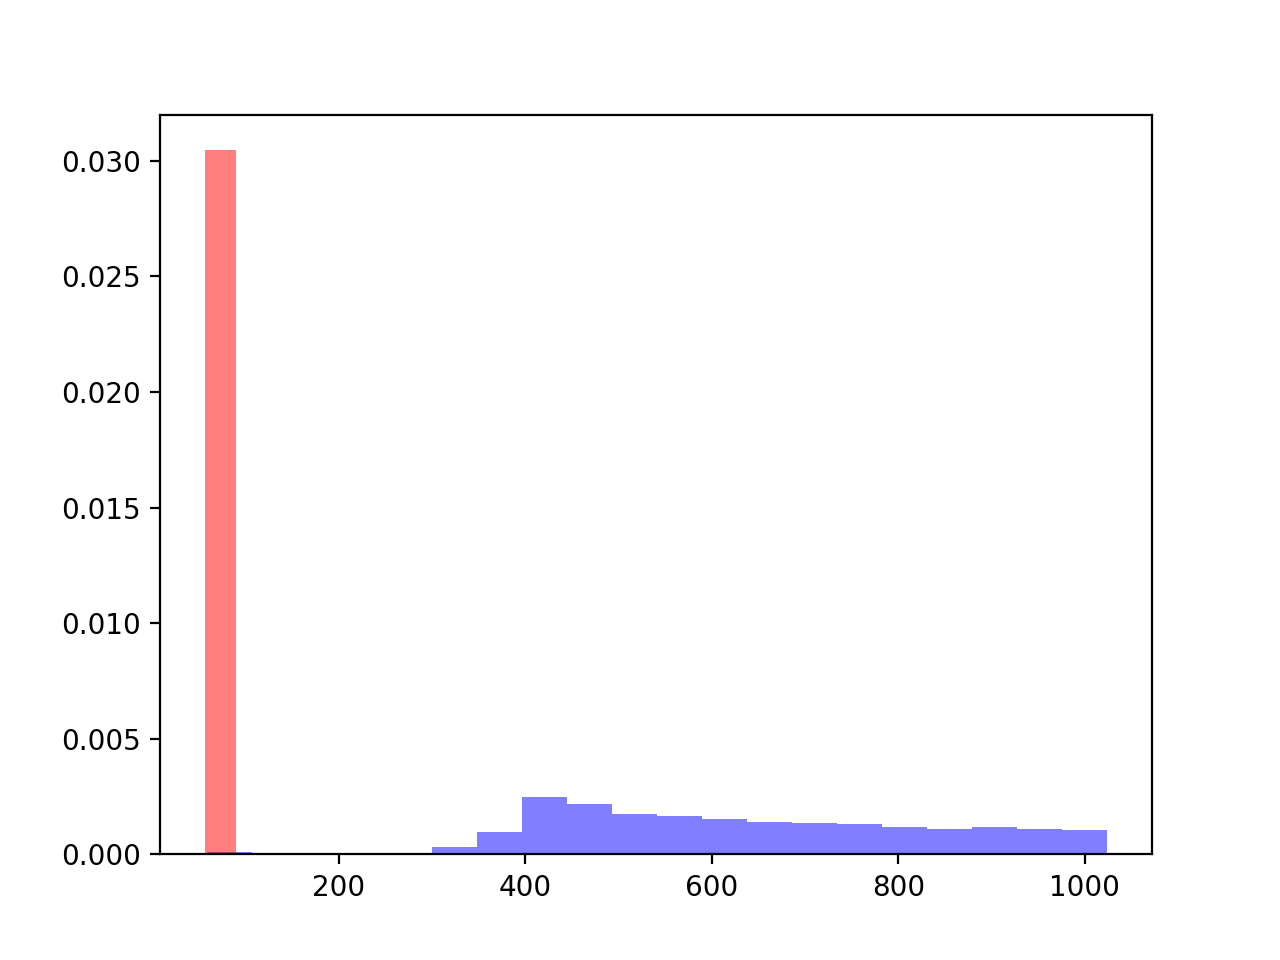

In [6]:
plt.hist(freq1, bins=20, density=True, alpha=0.5, color='b')
plt.hist(freq2, bins=20, density=True, alpha=0.5, color='r')
plt.show()

In [7]:
for i in range(0, len(freq1)):
    if freq1[i]>freq2[i]:
        freq1[i], freq2[i] = freq2[i], freq1[i]
        phi1[i], phi2[i] = phi2[i], phi1[i]

<IPython.core.display.Javascript object>


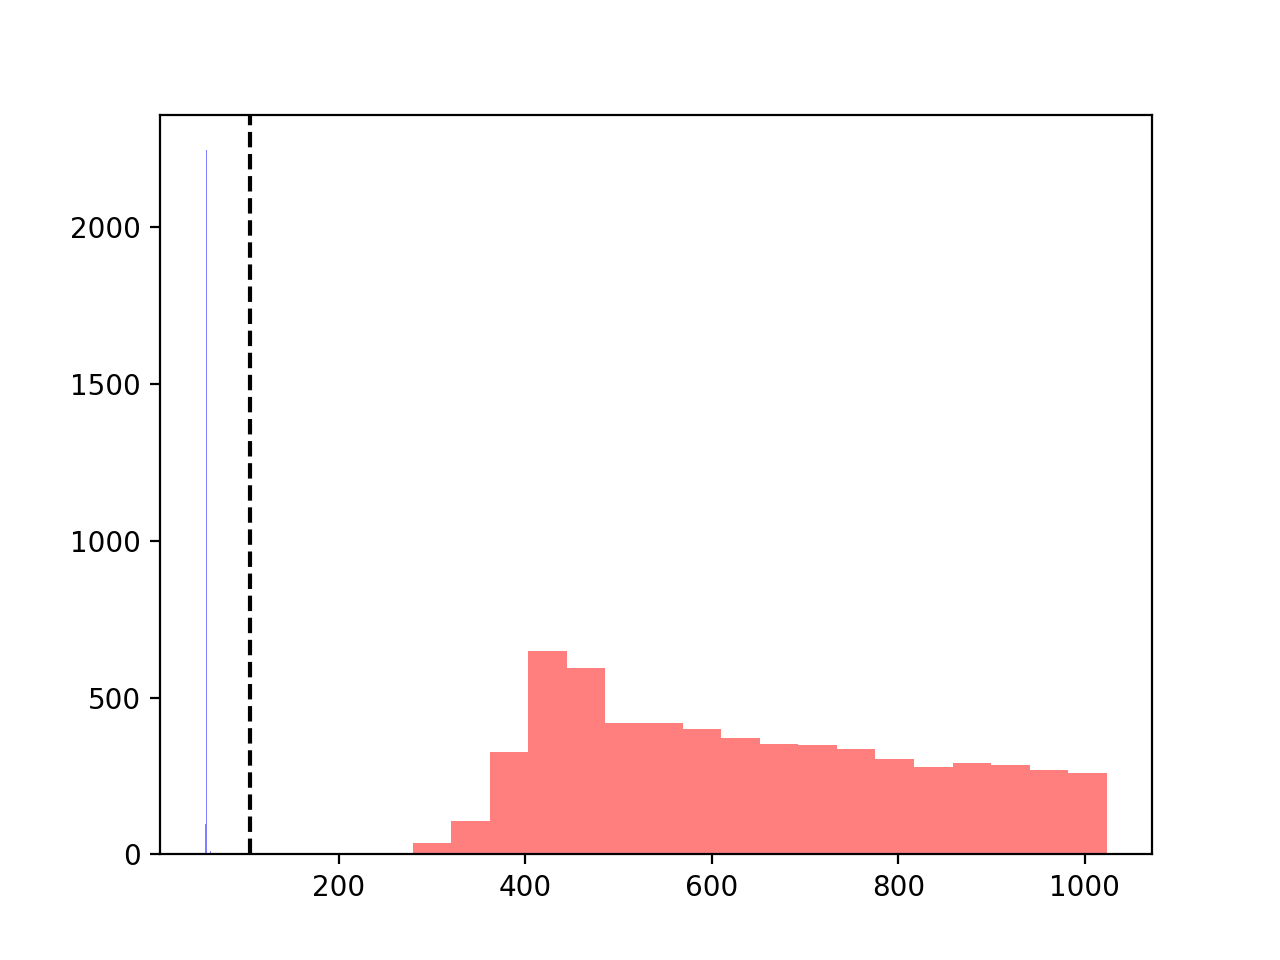

In [14]:
#plt.xlim([20.,600])
plt.hist(freq1, bins=20, density=False, alpha=0.5, color='b')
plt.hist(freq2, bins=20, density=False, alpha=0.5, color='r')
#plt.axvline(40.,linestyle='--', color='k') #first injected value
#plt.axvline(60.,linestyle='--', color='k') #second injected value
import lal
Mtotal = 42.17781844891334*lal.MTSUN_SI
fISCO = 1./(np.power(6.,3./2.)*np.pi*Mtotal)
plt.axvline(fISCO, linestyle='--', color='k') #the frequency of the last stable circular orbit before merger
plt.show()

As see in the above plots, the first frequency (blue) is recovered well as the posterior distribution is about 60 Hz, near the injected value. The second value (red) is not constrained at all, and the reason for this is because the algorithm is trying to sample at a frequency after the merger occured, so there r-modes are clearly no longer detectable in the waveform. The last emission before merger occurs at the innermost stable circular orbit (ISCO),  and the frequency emitted at ISCO can be calculated by this equation:

$$ f_{ISCO} = \frac{1}{6^{\frac{3}{2}} \pi M_{total}} $$

This frequency is plotted above as the black dashed line. To prevent this problem in the future, you can set the maximum R-mode frequency for recovery as the ISCO frequency in the config file when launching the run.

Also, it would be smarter to sample one frequency (for example, always the higher frequency) and some frequency ratio to ensure that posterior samples aren't double peaked.